# Sprint 5: Video Game Sales Analysis Project

## Project Overview

You work for the online store **Ice**, which sells video games globally. The goal of this project is to analyze video game sales data from 2016 in order to identify patterns that can predict a game's success. These patterns will help the company spot potential big winners and plan effective advertising campaigns for 2017.

The dataset includes information on:
- Game names
- Platforms (e.g., Xbox, PlayStation)
- Release years
- Genres
- Sales across different regions (North America, Europe, Japan, and others)
- User and expert reviews
- ESRB ratings

## Objective

The primary objective of this project is to conduct an exploratory data analysis (EDA) to determine what factors contribute to a game's success. Key areas of analysis will include:
- Sales trends over time and across different platforms
- The impact of reviews and ratings on sales
- Regional preferences for platforms and genres
- Hypothesis testing to explore differences in user ratings between platforms and genres

## Key Steps

1. **Data Exploration and Preprocessing:**
   - Load the dataset and inspect its structure.
   - Clean and preprocess the data by handling missing values and adjusting data types.

2. **Data Analysis:**
   - Examine sales trends by year, platform, and genre.
   - Analyze how sales are influenced by user and critic reviews.
   - Compare sales patterns in different regions.

3. **Hypothesis Testing:**
   - Test the hypothesis that the average user ratings of Xbox One and PC platforms are the same.
   - Test the hypothesis that user ratings for Action and Sports genres are different.

4. **Conclusion:**
   - Summarize the findings and insights that can guide the company's marketing and sales strategies for 2017.

---

Let’s start by exploring the dataset and preparing it for analysis.


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy import stats

df = pd.read_csv('/datasets/games.csv')

df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [2]:
# Convert column names to lowercase
df.columns = df.columns.str.lower()

df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [3]:
# Convert year_of_release to integers and handle missing values if necessary
df['year_of_release'] = pd.to_numeric(df['year_of_release'])

df = df.dropna(subset=['year_of_release'])

df['year_of_release'] = df['year_of_release'].astype(int)

# Convert user_score to numeric (handle missing values)
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [4]:
# Check for duplicates based on 'name', 'year', and 'platform'
duplicates = df[df.duplicated(subset=['name', 'year_of_release', 'platform'], keep=False)]

duplicates

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


In [5]:
# Modify the original dataframe to drop duplicates
df.drop_duplicates(subset=['name', 'year_of_release', 'platform'], keep='first', inplace=True)

df.duplicated().sum()

0

In [6]:
# Add a new column for total sales
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Check the updated dataframe
df


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [7]:
df.isna().sum()

name                  1
platform              0
year_of_release       0
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8462
user_score         8982
rating             6677
total_sales           0
dtype: int64

In [8]:
df = df.dropna(subset=['name'])

In [9]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
total_sales           0
dtype: int64

To perpare the data, we changed the year_of_release and user_score to an integer and float data type, respectively. We removed the missing values in year_of_release and name columns and left the missing values as is in the 3 score columns.

# Step 2: we will analyze the data of: 
        - Yearly game releases
        - Platform sales over time
        - Box Plot for global sales by platform
        - Correlation of reviews and sales for a platform (e.g., PS4)

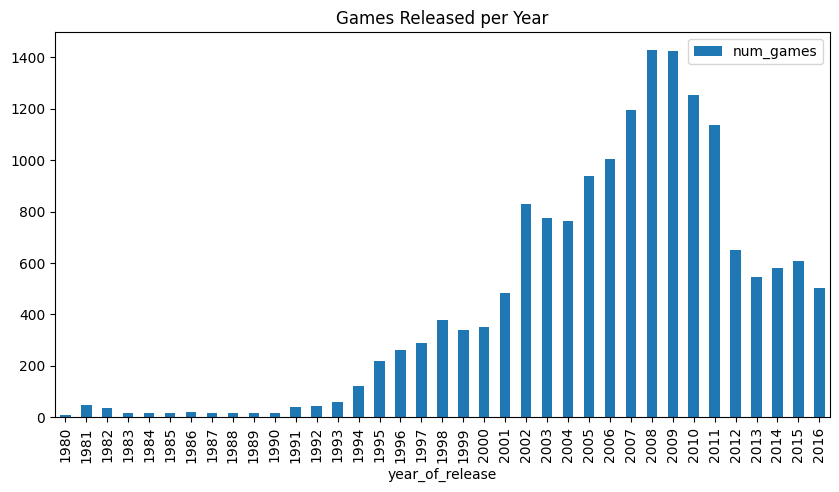

In [10]:
# Analyze game releases by year
games_per_year = df.groupby('year_of_release')['name'].count().reset_index()
games_per_year.columns = ['year_of_release', 'num_games']

# Plot the result
games_per_year.plot(
    x='year_of_release',
    y='num_games',
    kind='bar',
    figsize=(10,5),
    title='Games Released per Year'
)

plt.show()

The number of games released per year increased dramatically starting in the 2000s with 2008 and 2009 being the peak years.

In [11]:
# Filter the data to only include games released between 2007 and 2016
filtered_df = df[df['year_of_release'].between(2007, 2016)]

# Calculate total sales per platform for the years 2007-2016
platform_sales_2007_2016 = filtered_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Display platforms ordered from greatest to least total sales
print("(2007-2016) Total sales for each", platform_sales_2007_2016)


(2007-2016) Total sales for each platform
PS3     910.37
X360    901.37
Wii     754.03
DS      535.54
PS4     314.14
3DS     257.81
PSP     183.31
PS2     162.38
PC      160.57
XOne    159.32
WiiU     82.19
PSV      53.81
GBA       3.40
XB        0.73
GC        0.27
DC        0.06
Name: total_sales, dtype: float64


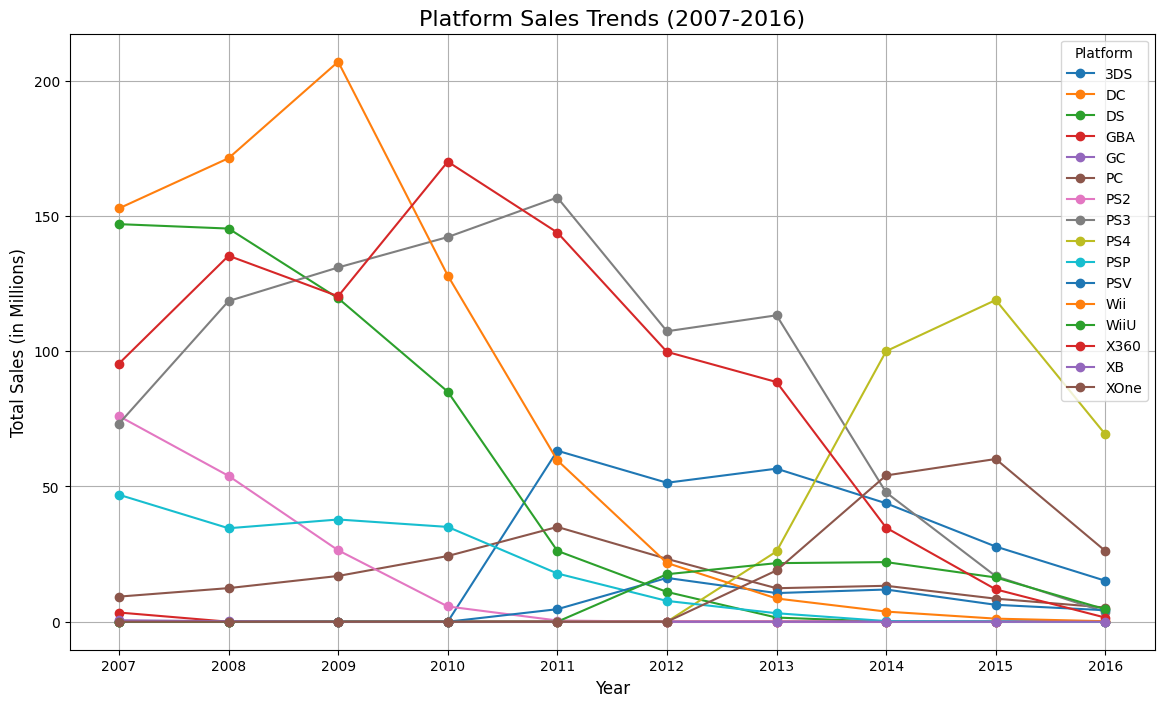

In [12]:
# Filter data for the years 2007-2016
filtered_df = df[df['year_of_release'].between(2007, 2016)]

# Group by platform and year, and sum the total sales
platform_sales_trend = filtered_df.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

# Pivot the table to create a matrix of platforms and sales over the years
platform_sales_pivot = platform_sales_trend.pivot(index='year_of_release', columns='platform', values='total_sales').fillna(0)

# Plot the sales trends for each platform from 2007-2016
plt.figure(figsize=(14, 8))
for platform in platform_sales_pivot.columns:
    plt.plot(platform_sales_pivot.index, platform_sales_pivot[platform], label=platform, marker='o')

# Add titles and labels
plt.title('Platform Sales Trends (2007-2016)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Sales (in Millions)', fontsize=12)
plt.legend(title='Platform', loc='upper right')
plt.grid(True)
plt.xticks(range(2007, 2017))

# Display the plot
plt.show()

From this graph, we can conclude that it takes about 10 years for a platform to go through its life cycle. We can also see that the number of platforms being bought after 2012 is on a decline from 2007 to 2012. We can decide that the only data that is relevant to the prediction of 2017 sales is only going to be the years 2012 to 2016.

From this graph, we can see that ps3 is on the decline and ps4 is on the rise and having the highest amount of sales from 2014-2016.

Platform sales (2012-2016):
platform           3DS     DS     PC     PS3     PS4   PSP    PSV    Wii  \
year_of_release                                                            
2012             51.36  11.01  23.22  107.35    0.00  7.69  16.19  21.71   
2013             56.57   1.54  12.38  113.25   25.99  3.14  10.59   8.59   
2014             43.76   0.00  13.28   47.76  100.00  0.24  11.90   3.75   
2015             27.78   0.00   8.52   16.82  118.90  0.12   6.25   1.14   
2016             15.14   0.00   5.25    3.60   69.25  0.00   4.25   0.18   

platform          WiiU   X360   XOne  
year_of_release                       
2012             17.56  99.74   0.00  
2013             21.65  88.58  18.96  
2014             22.03  34.74  54.07  
2015             16.35  11.96  60.14  
2016              4.60   1.52  26.15  


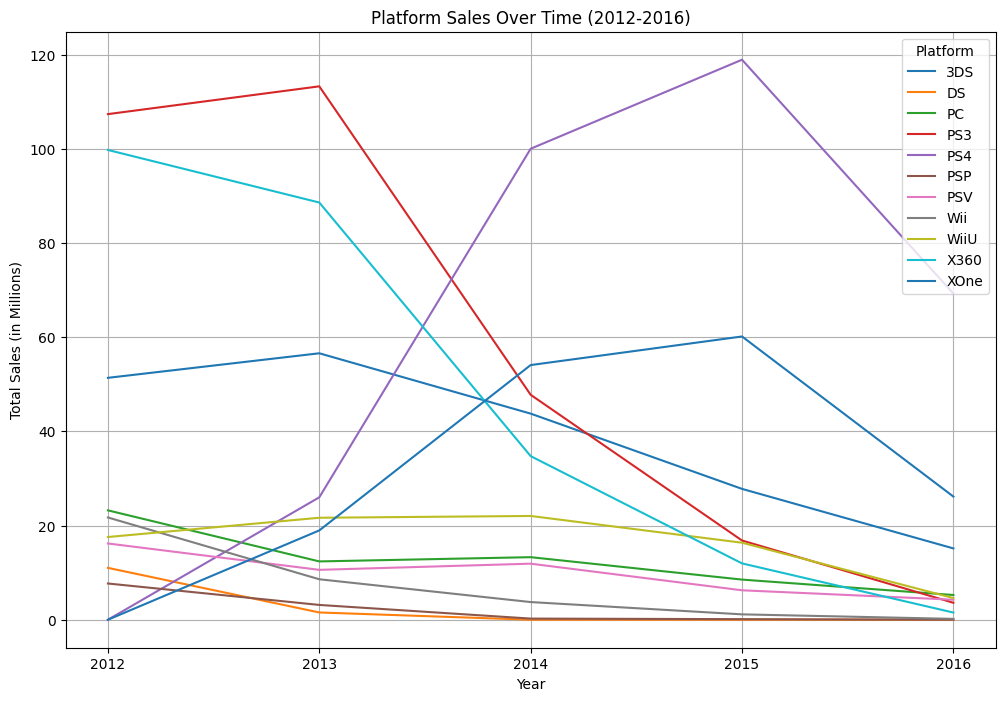

In [13]:
# Filter the data for the period 2012-2016
filtered_df = df[df['year_of_release'].between(2012, 2016)]

# Create a pivot table for platform sales by year
platform_sales_pivot = pd.pivot_table(filtered_df, values='total_sales', 
                                      index='year_of_release', columns='platform', 
                                      aggfunc='sum', fill_value=0)

# Display the pivot table
print("Platform sales (2012-2016):")
print(platform_sales_pivot)

# Plot the line chart to visualize the sales trend
plt.figure(figsize=(12, 8))
for platform in platform_sales_pivot.columns:
    plt.plot(platform_sales_pivot.index, platform_sales_pivot[platform], label=platform)

plt.title('Platform Sales Over Time (2012-2016)')
plt.xlabel('Year')
plt.ylabel('Total Sales (in Millions)')
plt.legend(title="Platform", loc='upper right')
plt.xticks(platform_sales_pivot.index)
plt.grid(True)
plt.show()

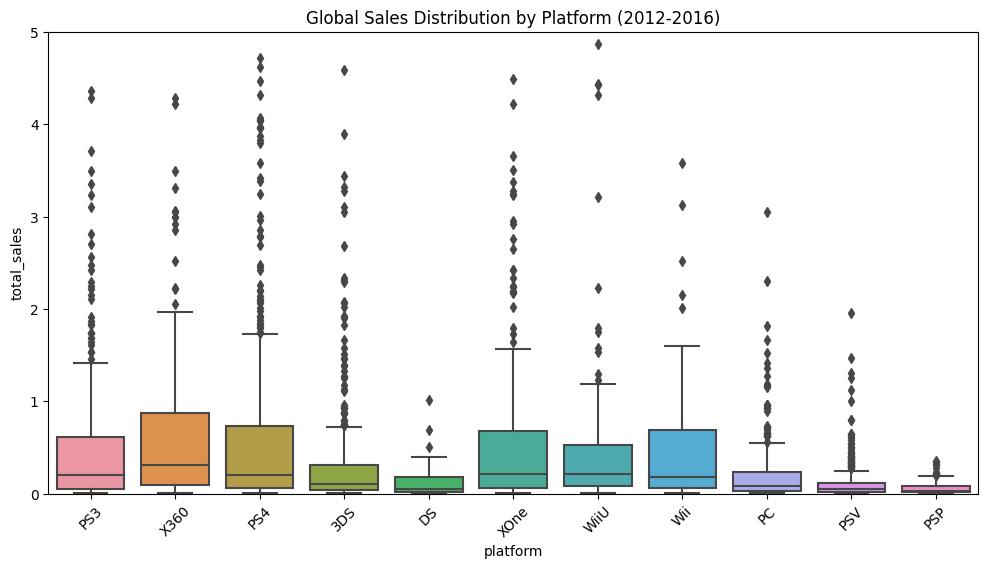

In [14]:
# Box plot for global sales per platform
plt.figure(figsize=(12, 6))
sns.boxplot(x='platform', y='total_sales', data=filtered_df)
plt.ylim(0, 5)  # Adjust the y-axis limit as needed
plt.xticks(rotation=45)
plt.title('Global Sales Distribution by Platform (2012-2016)')
plt.show()


We can conlude that the platforms that have a higher median and have many outliers are going to be the highest performers in sales. These platforms include X360, PS3, PS4, XOne, and Wii. We will take data from the 3 highest sales from 2016, according to the previous graph, which is PS4, XOne, and 3DS.

Correlation between User Score and Total Sales (PS4):
             user_score  total_sales
user_score     1.000000    -0.031957
total_sales   -0.031957     1.000000
Correlation between Critic Score and Total Sales (PS4):
              critic_score  total_sales
critic_score      1.000000     0.406568
total_sales       0.406568     1.000000


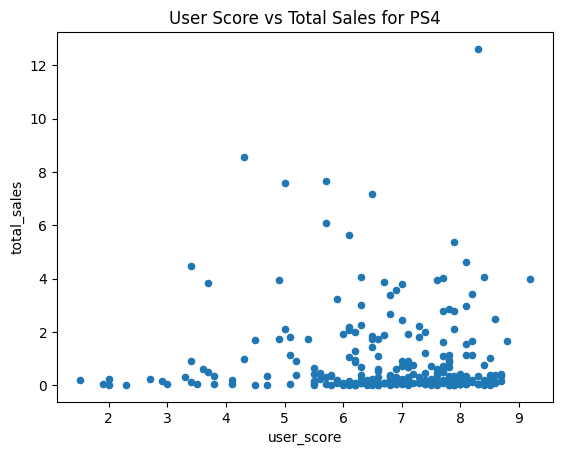

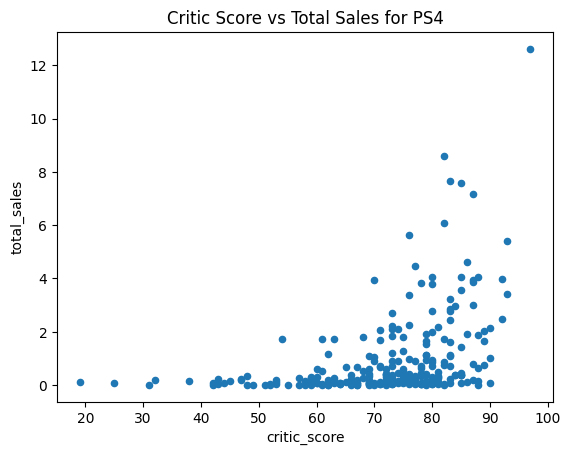

In [15]:
# Filter for PS4 games
ps4_games = df[df['platform'] == 'PS4']

# Scatter plot for user score vs total sales
ps4_games.plot(x='user_score', y='total_sales', kind='scatter', title='User Score vs Total Sales for PS4')

# Calculate correlation
correlation = ps4_games[['user_score', 'total_sales']].corr()
print("Correlation between User Score and Total Sales (PS4):")
print(correlation)

# Scatter plot for critic score vs total sales
ps4_games.plot(x='critic_score', y='total_sales', kind='scatter', title='Critic Score vs Total Sales for PS4')

# Calculate correlation for critic score
correlation_critic = ps4_games[['critic_score', 'total_sales']].corr()
print("Correlation between Critic Score and Total Sales (PS4):")
print(correlation_critic)

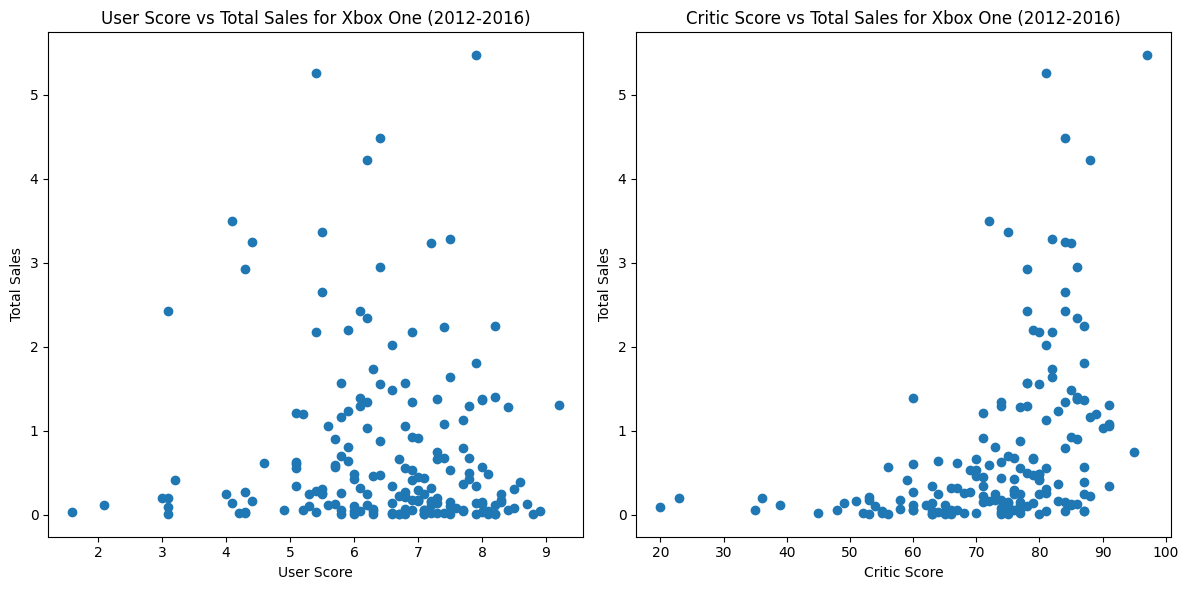

Correlation coefficients for Xbox One (2012-2016):
              user_score  critic_score  total_sales
user_score      1.000000      0.472462    -0.068925
critic_score    0.472462      1.000000     0.416998
total_sales    -0.068925      0.416998     1.000000


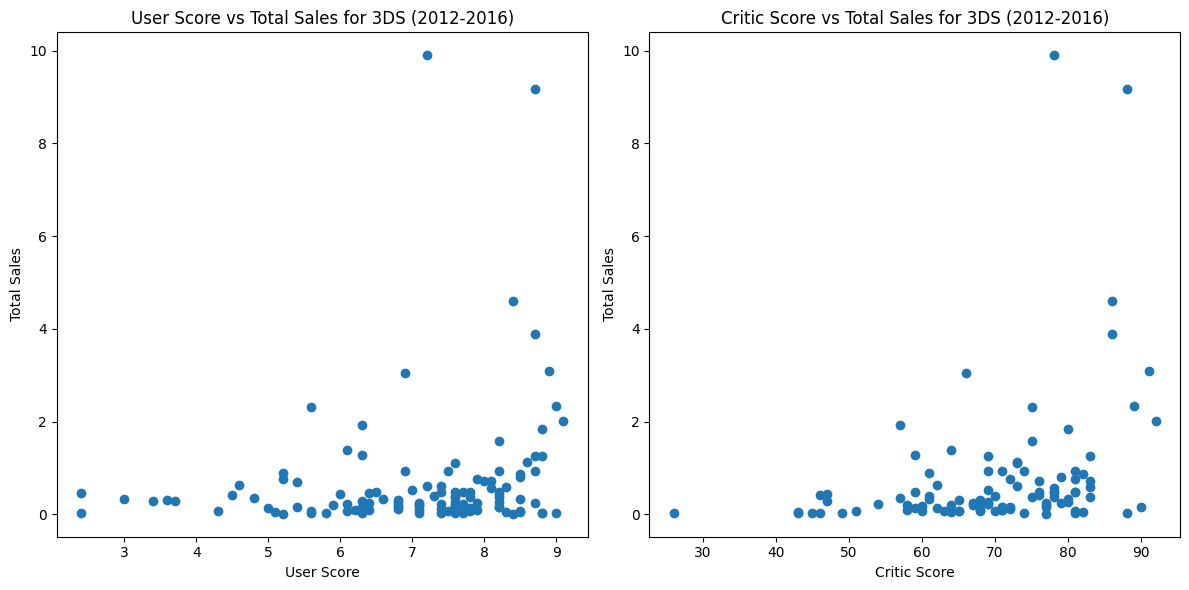

Correlation coefficients for 3DS (2012-2016):
              user_score  critic_score  total_sales
user_score      1.000000      0.722762     0.197583
critic_score    0.722762      1.000000     0.320803
total_sales     0.197583      0.320803     1.000000


In [16]:
# Filter data for the years 2012-2016
filtered_df = df[df['year_of_release'].between(2012, 2016)]

# Filter for XOne and 3DS
additional_platforms = ['XOne', '3DS']
additional_games = filtered_df[filtered_df['platform'].isin(additional_platforms)]

# XOne games
xone_games = additional_games[additional_games['platform'] == 'XOne']

# Scatter plots for XOne
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(xone_games['user_score'], xone_games['total_sales'])
plt.title('User Score vs Total Sales for Xbox One (2012-2016)')
plt.xlabel('User Score')
plt.ylabel('Total Sales')

plt.subplot(1, 2, 2)
plt.scatter(xone_games['critic_score'], xone_games['total_sales'])
plt.title('Critic Score vs Total Sales for Xbox One (2012-2016)')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales')

plt.tight_layout()
plt.show()

# Calculate correlation for Xbox One
xone_correlation = xone_games[['user_score', 'critic_score', 'total_sales']].corr()
print("Correlation coefficients for Xbox One (2012-2016):")
print(xone_correlation)

# 3DS games
n3ds_games = additional_games[additional_games['platform'] == '3DS']

# Scatter plots for 3DS
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(n3ds_games['user_score'], n3ds_games['total_sales'])
plt.title('User Score vs Total Sales for 3DS (2012-2016)')
plt.xlabel('User Score')
plt.ylabel('Total Sales')

plt.subplot(1, 2, 2)
plt.scatter(n3ds_games['critic_score'], n3ds_games['total_sales'])
plt.title('Critic Score vs Total Sales for 3DS (2012-2016)')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales')

plt.tight_layout()
plt.show()

# Calculate correlation for 3DS
n3ds_correlation = n3ds_games[['user_score', 'critic_score', 'total_sales']].corr()
print("Correlation coefficients for 3DS (2012-2016):")
print(n3ds_correlation)


For the correlation coefficients when can determine that the user score and the total sales for each of the 3 platforms are not correlated, as they are very close to 0.

The same goes for critic score and the total sales. They are not correlated because they are veru close to 0.

Total sales by genre in millions (2012-2016):
genre
Action          441.12
Shooter         304.73
Role-Playing    192.80
Sports          181.06
Misc             85.04
Platform         61.00
Racing           53.50
Fighting         44.49
Simulation       35.12
Adventure        29.43
Strategy         13.34
Puzzle            4.89
Name: total_sales, dtype: float64


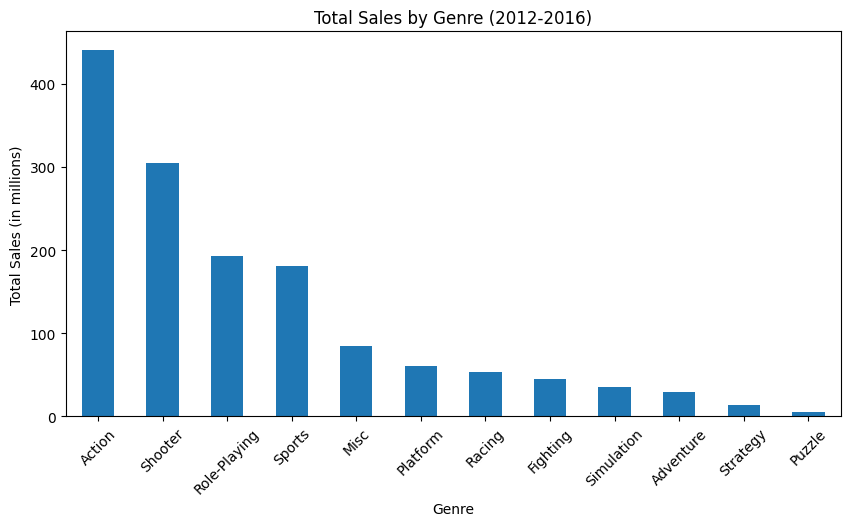

Average sales per game by genre in millions (2012-2016):
genre
Shooter         1.296723
Platform        0.717647
Sports          0.678127
Role-Playing    0.521081
Racing          0.465217
Misc            0.442917
Simulation      0.439000
Action          0.427856
Fighting        0.408165
Strategy        0.187887
Puzzle          0.174643
Adventure       0.097450
Name: total_sales, dtype: float64


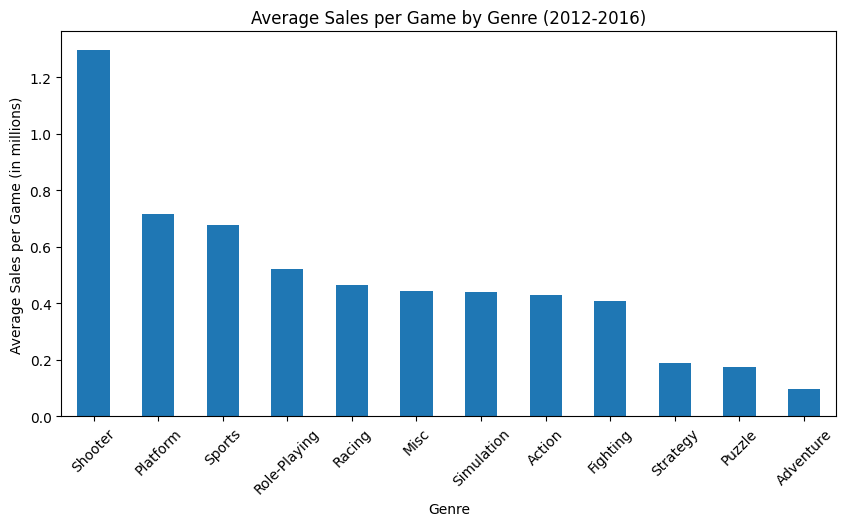

In [17]:
# Filter data for the years 2012-2016
filtered_df = df[df['year_of_release'].between(2012, 2016)]

# Group by genre and sum the total sales
genre_sales = filtered_df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Display the distribution of total sales by genre
print("Total sales by genre in millions (2012-2016):")
print(genre_sales)

# Plot the distribution of sales by genre
plt.figure(figsize=(10, 5))
genre_sales.plot(kind='bar')
plt.title('Total Sales by Genre (2012-2016)')
plt.xlabel('Genre')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45)
plt.show()

# Calculate the average sales per genre
average_sales_per_genre = filtered_df.groupby('genre')['total_sales'].mean().sort_values(ascending=False)

# Display average sales by genre
print("Average sales per game by genre in millions (2012-2016):")
print(average_sales_per_genre)

# Plot the average sales by genre
plt.figure(figsize=(10, 5))
average_sales_per_genre.plot(kind='bar')
plt.title('Average Sales per Game by Genre (2012-2016)')
plt.xlabel('Genre')
plt.ylabel('Average Sales per Game (in millions)')
plt.xticks(rotation=45)
plt.show()


In [18]:
# Filter the data for the period 2011-2016
filtered_df = df[(df['year_of_release'] >= 2012) & (df['year_of_release'] <= 2016)]

# Group by genre and calculate average and median total sales
genre_sales = filtered_df.groupby('genre')['total_sales'].agg(['count', 'mean', 'median'])

# Rename columns for clarity
genre_sales.columns = ['Number of Games', 'Average Sales per Game', 'Median Sales per Game']

# Sort by average sales in descending order
genre_sales_sorted = genre_sales.sort_values(by='Average Sales per Game', ascending=False)

# Display the results
genre_sales_sorted



,Number of Games,Average Sales per Game,Median Sales per Game
genre,,,
Shooter,235,1.296723,0.440
Platform,85,0.717647,0.210
Sports,267,0.678127,0.240
Role-Playing,370,0.521081,0.140
Racing,115,0.465217,0.140
Misc,192,0.442917,0.120
Simulation,80,0.439000,0.120
Action,1031,0.427856,0.120
Fighting,109,0.408165,0.130


We can generalize that the top genres that with the highest average sales per game in the time period 2012-2016 are SHOOTER, SPORTS, and ROLE-PLAYING. 

SHOOTER has about double the SPORTS genre.

# Regional User Profiles

In [19]:
# Filter the data for the period 2012-2016
filtered_df = df[(df['year_of_release'] >= 2012) & (df['year_of_release'] <= 2016)]

# Top 5 platforms by sales in North America, Europe, and Japan
top_platforms_na = filtered_df.groupby('platform')['na_sales'].sum().nlargest(5)
top_platforms_eu = filtered_df.groupby('platform')['eu_sales'].sum().nlargest(5)
top_platforms_jp = filtered_df.groupby('platform')['jp_sales'].sum().nlargest(5)

# Top 5 genres by sales in North America, Europe, and Japan
top_genres_na = filtered_df.groupby('genre')['na_sales'].sum().nlargest(5)
top_genres_eu = filtered_df.groupby('genre')['eu_sales'].sum().nlargest(5)
top_genres_jp = filtered_df.groupby('genre')['jp_sales'].sum().nlargest(5)

# Display the results
print("Top 5 Platforms in North America (2012-2016):\n", top_platforms_na, "\n")
print("Top 5 Platforms in Europe (2012-2016):\n", top_platforms_eu, "\n")
print("Top 5 Platforms in Japan (2012-2016):\n", top_platforms_jp, "\n")

print("Top 5 Genres in North America (2012-2016):\n", top_genres_na, "\n")
print("Top 5 Genres in Europe (2012-2016):\n", top_genres_eu, "\n")
print("Top 5 Genres in Japan (2012-2016):\n", top_genres_jp, "\n")



Top 5 Platforms in North America (2012-2016):
 platform
X360    140.05
PS4     108.74
PS3     103.38
XOne     93.12
3DS      55.31
Name: na_sales, dtype: float64 

Top 5 Platforms in Europe (2012-2016):
 platform
PS4     141.09
PS3     106.85
X360     74.52
XOne     51.59
3DS      42.64
Name: eu_sales, dtype: float64 

Top 5 Platforms in Japan (2012-2016):
 platform
3DS     87.79
PS3     35.29
PSV     21.04
PS4     15.96
WiiU    13.01
Name: jp_sales, dtype: float64 

Top 5 Genres in North America (2012-2016):
 genre
Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19
Name: na_sales, dtype: float64 

Top 5 Genres in Europe (2012-2016):
 genre
Action          159.34
Shooter         113.47
Sports           69.08
Role-Playing     48.53
Racing           27.29
Name: eu_sales, dtype: float64 

Top 5 Genres in Japan (2012-2016):
 genre
Role-Playing    65.44
Action          52.80
Misc            12.86
Simulation      10.41
Fighting 

Sales by ESRB Rating in North America (2012-2016):
 rating
M       231.57
E       114.37
E10+     75.70
T        66.02
Name: na_sales, dtype: float64 

Sales by ESRB Rating in Europe (2012-2016):
 rating
M       193.96
E       113.02
E10+     55.37
T        52.96
Name: eu_sales, dtype: float64 

Sales by ESRB Rating in Japan (2012-2016):
 rating
E       28.33
T       26.02
M       21.20
E10+     8.19
Name: jp_sales, dtype: float64 



(array([0, 1, 2, 3]),
 [Text(0, 0, 'E'), Text(1, 0, 'T'), Text(2, 0, 'M'), Text(3, 0, 'E10+')])

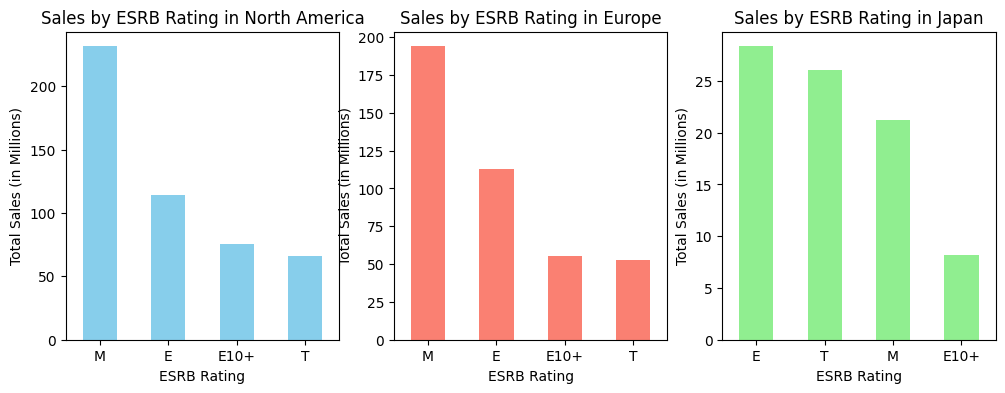

In [20]:
# Filter the data for the period 2012-2016
filtered_df = df[(df['year_of_release'] >= 2012) & (df['year_of_release'] <= 2016)]

# Group by ESRB rating and sum the total sales in each region
esrb_sales_na = filtered_df.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
esrb_sales_eu = filtered_df.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
esrb_sales_jp = filtered_df.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

# Display the results
print("Sales by ESRB Rating in North America (2012-2016):\n", esrb_sales_na, "\n")
print("Sales by ESRB Rating in Europe (2012-2016):\n", esrb_sales_eu, "\n")
print("Sales by ESRB Rating in Japan (2012-2016):\n", esrb_sales_jp, "\n")

# Visualize the sales distribution by ESRB rating in each region
import matplotlib.pyplot as plt

# Plot for North America
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
esrb_sales_na.plot(kind='bar', color='skyblue')
plt.title('Sales by ESRB Rating in North America')
plt.xlabel('ESRB Rating')
plt.ylabel('Total Sales (in Millions)')
plt.xticks(rotation=0)  # Change x-axis labels to be horizontal

# Plot for Europe
plt.subplot(1, 3, 2)
esrb_sales_eu.plot(kind='bar', color='salmon')
plt.title('Sales by ESRB Rating in Europe')
plt.xlabel('ESRB Rating')
plt.ylabel('Total Sales (in Millions)')
plt.xticks(rotation=0)  # Change x-axis labels to be horizontal

# Plot for Japan
plt.subplot(1, 3, 3)
esrb_sales_jp.plot(kind='bar', color='lightgreen')
plt.title('Sales by ESRB Rating in Japan')
plt.xlabel('ESRB Rating')
plt.ylabel('Total Sales (in Millions)')
plt.xticks(rotation=0)  # Change x-axis labels to be horizontal


All three regions had different top platforms in different orders from 2012-2016. NA's top 3 were X360, PS4, PS3. EU's top 3 were PS4, PS3, and X360. JP's top 3 were 3DS, PS3, and PSV.

NA and EU had the same top genres of Action, Shooter, and Sports. While JP's top genres were Role-playing, Action, and Misc.

You can conclude that different parts of the world are intereste in playing different games and genres.

AS for ratings, the Mature rated games sell well in NA and EU than they do in JP. It seems like JP likes more games that are rated for Everyone to play.

# Step 3: Test the following hypothesis
- H0 = There is no significant difference in the average user ratings between video games on PC and Xbox platforms.
- H1 = There is a significant difference in the average user ratings between video games on PC and Xbox platforms.

- H0 = There is no significant difference in the average user ratings between the Action and Sports genres.
- H1 = There is a significant difference in the average user ratings between the Action and Sports genres.
- Significance level = 0.05



In [21]:
# Filter data for Xbox One and PC from the filtered dataset
xbox_data = filtered_df[filtered_df['platform'] == 'XOne']['user_score'].dropna()
pc_data = filtered_df[filtered_df['platform'] == 'PC']['user_score'].dropna()

# Perform t-test
t_stat, p_value = stats.ttest_ind(xbox_data, pc_data)

# Output the results
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 0.5930304646661255, P-value: 0.5535080500643661


In [22]:
# Filter data for Action and Sports genres from the filtered dataset
action_data = filtered_df[filtered_df['genre'] == 'Action']['user_score'].dropna()
sports_data = filtered_df[filtered_df['genre'] == 'Sports']['user_score'].dropna()

# Perform t-test
t_stat, p_value = stats.ttest_ind(action_data, sports_data)

# Output the results
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 10.984175532598625, P-value: 4.8045233804629176e-26


###### General Conclusion

**Key Results:**

**Significant Differences:**

- **User Scores Between Xbox One and PC:**  
  The p-value is above 0.05, indicating no significant difference in user scores between the Xbox One and PC platforms.

- **User Ratings Between Action and Sports:**  
  The p-value is below 0.05, suggesting there is significant difference in the average user ratings between the Action and Sports genres.

**Platforms:**

- **PlayStation 4 (PS4):**  
  Known for high sales and a broad range of popular games. It has consistently been a top performer in global sales and has maintained a strong presence in all major regions.

- **Xbox 360 (X360):**  
  Historically successful with strong sales performance, especially prominent in North America. Its popularity has waned over time, but it remains notable for its historical success.

- **Xbox One (XOne):**  
  Has seen strong performance in North America and Europe. While not as dominant as PS4, it remains a significant player in the market with a solid game library.

**Genres:**

- **Action:**  
  Generally high sales and popularity. Action games consistently attract large audiences and generate substantial revenue across all regions.

- **Shooter:**  
  Often achieves strong sales and engaging gameplay. This genre maintains significant popularity, particularly in North America and Europe.

- **Sports:**  
  Consistently popular and exhibits high user engagement. Sports games perform well across all major markets, especially in North America.

**Regional Insights:**

- **North America (NA):**  
  The top platforms in NA include PlayStation 4, Xbox One, and Xbox 360. Action and Shooter genres lead in sales, with Action games showing the highest total sales. Sports games also perform well but do not surpass Action games in overall sales.

- **Europe (EU):**  
  PlayStation 4 and Xbox One are top performers in Europe. The Action and Shooter genres dominate sales, similar to North America. Sports games also perform well, though Action games are more prominent.

- **Japan (JP):**  
  Nintendo Switch and PlayStation 4 lead in Japan, with a notable preference for unique and genre-specific games. Action games are highly popular, but RPG and Simulation genres also contribute significantly to sales in this region.

**Conclusion:**  
The analysis indicates that while Action games are universally popular and successful, regional preferences and platform popularity can vary. Understanding these differences helps in targeting advertising campaigns and planning for future releases. Platforms like PS4 and Xbox One are consistently strong performers across regions, while genres like Action and Shooter hold broad appeal. Tailoring strategies to regional preferences can enhance market success.
